In [1]:
import pandas as pd

In [7]:
data = pd.read_csv("df2.csv")
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


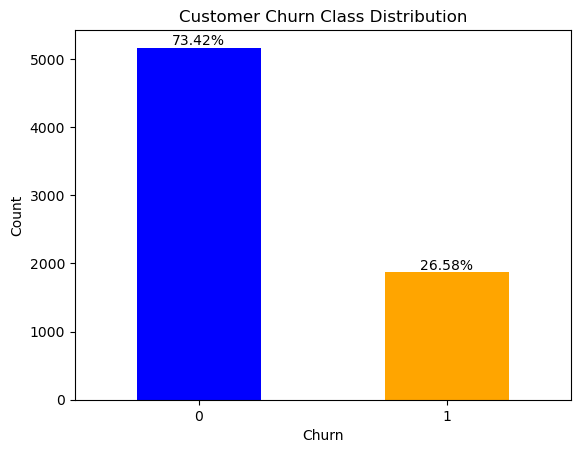

Churned count: 1869
Non-churned count: 5163
Class ratio (churned/non-churned): 0.36199883788495063


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('df2.csv')

# Calculate class distribution
class_distribution = data['Churn'].value_counts()

# Visualize class distribution
ax = class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Customer Churn Class Distribution')

# Add percentage annotations
total = len(data)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), f"{i.get_height()/total:.2%}", ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

# Compute class ratios
churned_count = class_distribution[1]
non_churned_count = class_distribution[0]
class_ratio = churned_count / non_churned_count

print("Churned count:", churned_count)
print("Non-churned count:", non_churned_count)
print("Class ratio (churned/non-churned):", class_ratio)


## Over Sampling SMOTE

In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv('df2.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)

# Visualize class distribution after oversampling
class_distribution_resampled = resampled_data['Churn'].value_counts()
print("Class distribution after oversampling:")
print(class_distribution_resampled)

# Save the resampled dataset to a new CSV file if needed
resampled_data.to_csv('resampled_dataset.csv', index=False)


Class distribution after oversampling:
Churn
0    5163
1    5163
Name: count, dtype: int64
